In [1]:
# Analysis to choose the best laser printer based on popularity and budget from Flipkart e-commerce site  

In [2]:
from bs4 import BeautifulSoup # for web scraping
import requests
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [3]:
# To get the data from https site
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.77 Safari/537.36"}
total_pages= 3 # Total pages in search result
responses = ""

for i in range(total_pages):
    pageno = i+1

    url = "https://www.flipkart.com/search?q=laser+printers&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&sort=popularity&page="+str(pageno)
    response = requests.get(url,headers)
    responses += response.content.decode()
  
soup = BeautifulSoup(responses, "html.parser")
#print(soup)

In [4]:

# Find all product containers on the page, 
product_containers = soup.find_all("div", {"class": "_1AtVbE col-12-12"}) # Row level div

# List objects to store data

company_name = [] 
product_name = []
print_page_type = []
per_page_cost = []
cartrigetype = []
rating = []
no_of_people_rated = []
discount_percent = []
actual_price = []
selling_price = []
delivery = []
offer = []

# Extract information about each product
for container in product_containers:
    product_data = container.find_all("div", {"class": "_4ddWXP"}) # product level div  
    
    for col in product_data:
        product = col.find("a",{'class': "s1Q9rs"}).get('title') # product title 
        CartrigeType = col.find("div", {"class": "_3Djpdu"}).text # product cartridge type
        offerprice = col.find("div",{'class':"_30jeq3"}).text # product offer_price 
        
        actualprice = 0
        Rating = 0
        people_voted = 0
        discounts = 0
        delivery_by = ''
        other_offer = ''
        
        # check the number of people rated product 
        
        if col.find("span",{'class':"_2_R_DZ"}) is not None:
            people_voted = col.find("span",{'class':"_2_R_DZ"}).text
            people_voted = people_voted.replace("(", "").replace(")", "")
            people_voted = int(people_voted.replace(',',''))
            
        # check for product rating
            
        if col.find("div",{'class':"_3LWZlK"}) is not None:
            Rating = col.find("div",{'class':"_3LWZlK"}).text

        # check actual price of the product

        if col.find("div",{'class':"_3I9_wc"}) is not None:
            actualprice = col.find("div",{'class':"_3I9_wc"}).text
        
        # check total discounts on product
   
        if  col.find("div",{'class':"_3Ay6Sb"}) is not None:
            discounts = col.find("div",{'class':"_3Ay6Sb"}).text
        
        # check delivery option

        if  col.find("div",{'class':"_2Tpdn3"}) is not None:
            delivery_by = col.find("div",{'class':"_2Tpdn3"}).text
        
        # check if any other offer for a product

        if  col.find("div",{'class':"_3xFhiH"}) is not None:
            #offer = ' '.join([div.text for div in col.find_all('div', {'class': '_2Tpdn3 _18hQoS'})])
            other_offer = col.find("div",{'class':"_3xFhiH"}).text
            
        # If product contains print per page cost data which is available inside ()
        
        product_data = re.match(r"(.*) \((.*)\)", product)
        
        if product_data:
            
            # If Rs. data is available
            
            if 'Rs.' in product_data.group(2):
                product_title = product_data.group(1)
                page_type_cost = product_data.group(2).split(':')
                
                if len(page_type_cost) > 1:
                    page_type = page_type_cost[0].replace('Page Cost','').replace('Black ','Black')
                    page_cost = page_type_cost[1]
                else:
                    page_type = page_type_cost[0]
                    page_cost = None
                
            else:
                product_title = product
                page_type = None
                page_cost = None
        else:
            product_title = product
            page_type = None
            page_cost = None
       
       # Manufacturing company name
        
        company =   product_title.split(' ')
        
        if 'Yonkx' in company:
            company = 'Canon'
        else:
            company = company[0]
        
        # Add product data in a corresponding feature list
        
        company_name.append(company)        
        product_name.append(product_title)    
        print_page_type.append(page_type)
        per_page_cost.append(page_cost)
       
        cartrigetype.append(CartrigeType)
        rating.append(Rating)
        no_of_people_rated.append(people_voted)
        discount_percent.append(discounts)
        selling_price.append(offerprice)
        actual_price.append(actualprice)
        delivery.append(delivery_by)
        offer.append(other_offer)

       
        #print(company,'--',product_title,'--',page_type,'--',page_cost,'--',CartrigeType,'--',Rating,'--',people_voted,'--',
         #     offerprice,'--',actualprice,'--',discounts,'--',delivery_by,'--',other_offer)        
        
# Check the length of each feature list

print(len(product_name),len(cartrigetype),len(rating),len(no_of_people_rated),len(discount_percent),len(selling_price),len(actual_price),len(delivery),len(offer))

# Add each feature list data in to dataframe

df = pd.DataFrame({'company_name':company_name,'product_name':product_name,'print_page_type':print_page_type,'print_page_cost':per_page_cost,'cartrige_type':cartrigetype,'rating':rating,'no_of_people_rated':no_of_people_rated,
                  'discount_percent':discount_percent,'actual_price':actual_price,'selling_price':selling_price,'delivery':delivery,'offer':offer})


108 108 108 108 108 108 108 108 108


##### All  9 features is of same length

In [5]:
# check first 5 records

df.head()

,company_name,product_name,print_page_type,print_page_cost,cartrige_type,rating,no_of_people_rated,discount_percent,actual_price,selling_price,delivery,offer
0,brother,brother HL-L2321D IND Single Function Monochro...,Black,1.46 Rs.,"Grey, Toner Cartridge",4.5,3359,15% off,"₹11,790","₹9,949",Free delivery,"Upto ₹1,000 Off on Exchange"
1,HP,HP LaserJet Pro MFP M126nw Multi-function WiFi...,Black,3.28 Rs.,"Black, Toner Cartridge",4.3,3964,6% off,"₹23,525","₹21,999",Free delivery,"Upto ₹1,000 Off on Exchange"
2,brother,brother DCP-L2541DW IND Multi-function WiFi Mo...,Black,1.46 Rs.,"Black, Toner Cartridge",4.3,362,7% off,"₹23,490","₹21,699",Free delivery,"Upto ₹1,000 Off on Exchange"
3,brother,brother DCP-B7535DW Multi-function Monochrome ...,None,None,"Grey, Toner Cartridge",4.4,603,0,0,"₹25,290",Free delivery,"Upto ₹1,000 Off on Exchange"
4,brother,brother DCP-L2520D IND Multi-function Monochro...,Black,1.46 Rs.,"Grey, Toner Cartridge",4.4,1279,7% off,"₹16,490","₹15,249",Free delivery,"Upto ₹1,000 Off on Exchange"


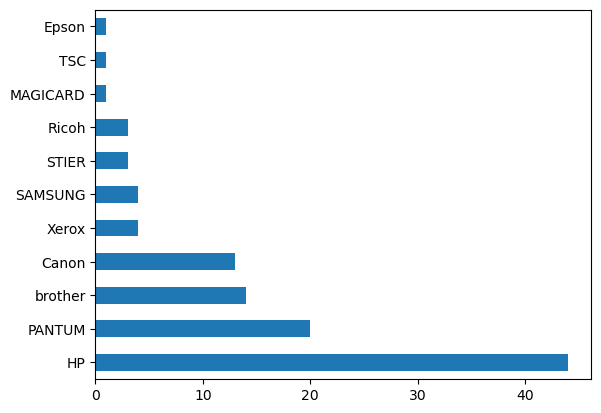

In [6]:
#### companywise laser printers availablity

df['company_name'].value_counts().plot.barh()
plt.show()

#### Total 11 company's laser printers are available 
- Most of the laser printers is from HP followed by PANTUM,brother and canon
- Very less number of laser printers is from Epson,TSC and MAGICARD 

In [7]:
# companywise min and max sales price

df['selling_price'] = df['selling_price'].str.replace('₹','').str.replace(',', '').astype(float)

df.groupby(['company_name'])['selling_price'].agg([min,max,np.mean])

,min,max,mean
company_name,,,
Canon,299.0,21083.0,14876.076923
Epson,27000.0,27000.0,27000.000000
HP,8626.0,74360.0,26946.159091
MAGICARD,48000.0,48000.0,48000.000000
PANTUM,6699.0,20199.0,11887.900000
Ricoh,15899.0,19999.0,17365.666667
SAMSUNG,7200.0,15299.0,10650.000000
STIER,39000.0,271000.0,136666.666667
TSC,26991.0,26991.0,26991.000000


##### Samsung laser printer's average cost is lowest followed by PANTUM,STIER and Xerox
##### STIER and MAGICARD laser printers are costlier

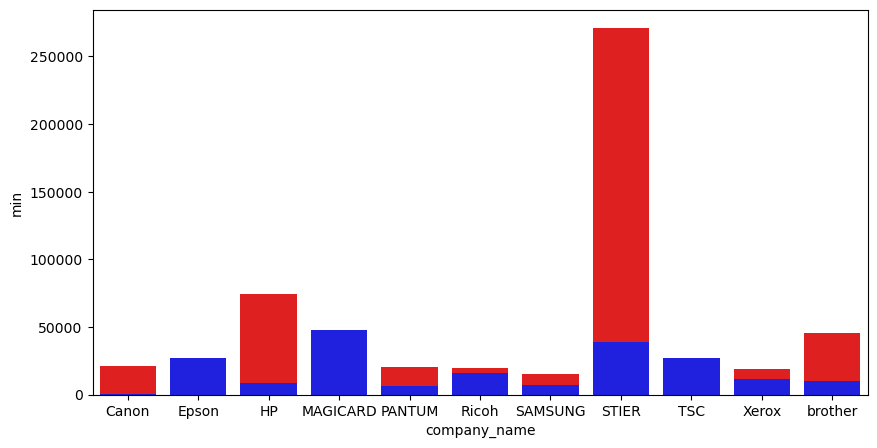

In [8]:
import seaborn as sns

min_max_df = df.groupby('company_name')['selling_price'].agg(['min', 'max'])
min_max_df = min_max_df.reset_index()
plt.figure(figsize=(10, 5))

sns.barplot(x='company_name', y='max', data=min_max_df, color='red')
sns.barplot(x='company_name', y='min', data=min_max_df, color='blue')
plt.show()

##### only one laser printer product is available from Epson,MAGICARD

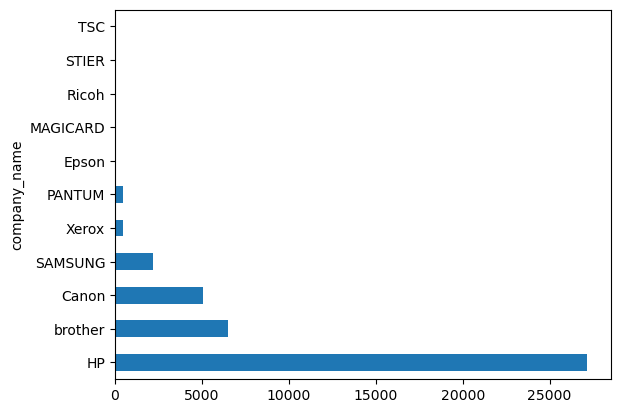

In [9]:
# People rated for each company

df.groupby(['company_name'])['no_of_people_rated'].sum().sort_values(ascending=False).plot.barh()
plt.show()

##### Laser printer ratings for STIER,Ricoh,MAGICARD and Epson company not available 

In [10]:
df_count = df.groupby('company_name')['no_of_people_rated'].sum().reset_index(name='count')
nonzero_company = df_count[df_count['count']>0]
nonzero_company

,company_name,count
0,Canon,5088
2,HP,27174
4,PANTUM,438
6,SAMSUNG,2208
9,Xerox,459
10,brother,6495


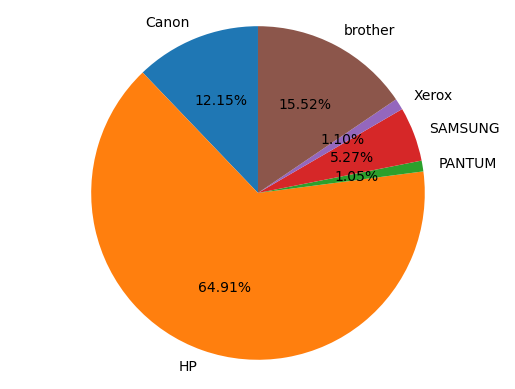

In [11]:
# total rating percentage for each company

plt.pie(nonzero_company['count'],labels=nonzero_company['company_name'], startangle=90, autopct='%1.2f%%')
plt.axis('equal')
plt.show()

##### Maximum i.e. 62.91 percent ratings is for HP company's laser printer
##### HP,Canon and brother contributes 92 % of total peoples vote

In [12]:
# Check the maximum discount on laser printer 
df_discount = df.copy()
df_discount['discount_percent']= df_discount['discount_percent'].str.replace('% off','')
df_discount.dropna(subset=['discount_percent'],inplace=True)
df_discount['discount_percent'] = df_discount['discount_percent'].astype(int)
df_discount[['discount_percent','product_name','no_of_people_rated','rating','selling_price','actual_price']].sort_values(by='discount_percent',ascending=False)

,discount_percent,product_name,no_of_people_rated,rating,selling_price,actual_price
89,56,Ricoh SP 6430DN Single Function Monochrome Las...,0,0,19999.0,"₹45,999"
94,37,Ricoh 212SNW PRINTER Multi-function Monochrome...,0,0,16199.0,"₹25,999"
50,33,PANTUM M6503 Printer Multi-function Monochrome...,0,0,13299.0,"₹19,990"
61,33,PANTUM P2503 Laser printer Single Function Mon...,0,0,9999.0,"₹14,990"
53,32,PANTUM P2500W Single Function WiFi Monochrome ...,104,4.2,6699.0,"₹9,990"
...,...,...,...,...,...,...
49,2,Canon imageCLASS LBP6030B Single Function Mono...,10,4.3,13099.0,"₹13,499"
88,1,Canon imageCLASS LBP2900B Single Function Lase...,4,2.3,19499.0,"₹19,795"
54,1,SAMSUNG Sl-M2021 Single Function Printer (Whit...,3,2,7200.0,"₹7,294"
77,1,brother HL-L5000D Single Function Monochrome L...,0,0,25819.0,"₹26,190"


#### Even though discount is too high i.e. 33 or more , people are not willing to purchase

In [13]:
# Top 5 products based on number of peoples rated

top_5_rated_product = df.sort_values(by='no_of_people_rated', ascending=False).head()
top_5_rated_product

,company_name,product_name,print_page_type,print_page_cost,cartrige_type,rating,no_of_people_rated,discount_percent,actual_price,selling_price,delivery,offer
26,HP,HP LaserJet M1005 MFP Multi-function Monochrom...,Black,3 Rs.,"White, Black, Toner Cartridge",4.5,4777,0,0,20520.0,Free delivery,"Upto ₹1,000 Off on Exchange"
8,HP,HP LaserJet Pro MFP M126a Printer Multi-functi...,None,None,"Black, Toner Cartridge",4.3,3964,7% off,"₹21,090",19499.0,Free delivery,"Upto ₹1,000 Off on Exchange"
1,HP,HP LaserJet Pro MFP M126nw Multi-function WiFi...,Black,3.28 Rs.,"Black, Toner Cartridge",4.3,3964,6% off,"₹23,525",21999.0,Free delivery,"Upto ₹1,000 Off on Exchange"
0,brother,brother HL-L2321D IND Single Function Monochro...,Black,1.46 Rs.,"Grey, Toner Cartridge",4.5,3359,15% off,"₹11,790",9949.0,Free delivery,"Upto ₹1,000 Off on Exchange"
29,HP,HP 1200a Multi-function Monochrome Laser Printer,Black,0.28 Rs.,"White, Grey, Toner Cartridge",4.1,2561,12% off,"₹24,578",21399.0,Free delivery,"Upto ₹1,000 Off on Exchange"


### Conclusion
- Total 11 company's printer are available on flipkart e-commerce site 
- Maximum number of laser printers on flipkart is from HP company.
- STIER and MAGICARD laser printers are costlier
- HP company's laser printers are famous in people because out of 5 top rated laser printer, 4 printers are from HP company
- If the price budget is less than ₹10,000 then brother company's "brother HL-L2321D IND Single Function Monochrome Laser   
  Printer"  with "Grey, Toner Cartridge" is recommended.
- If the price budget is around ₹20,000 then HP company's "HP LaserJet M1005 MFP Multi-function Monochrome Laser Printer" with     "White, Black, Toner Cartridge" is recommended.